<a href="https://colab.research.google.com/github/o-rma/ML-FLASK-Pythonanywhere/blob/master/%E9%80%9A%E4%BF%A1%E5%B7%A5%E5%AD%A6%E3%81%AE%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
pi = np.pi

## 3.1 離散フーリエ変換

振幅がpeak-to-peakで2の方形波となる配列を作成する。





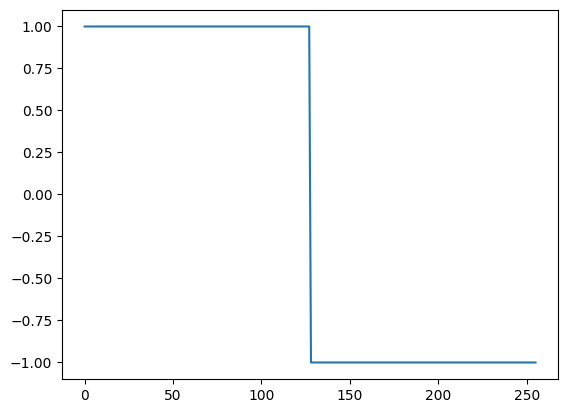

In [ ]:
N = 256
t = np.arange(256)
rectwave = np.zeros(256)
for i in t:
  if i < (N / 2):
    rectwave[i] = 1
  else:
    rectwave[i] = -1

plt.plot(rectwave)


```
numpy.arange([start, ]stop, [step])
```
Return evenly spaced values within a given interval.
Values are generated within the half-open interval `[start, stop) `

Parameters:

- `start`: Start of interval 指定しないとき0
- `stop`: End of interval
- `step`: Spacing between values. `out[i+1] - out[i]`

```
numpy.zeros(shape)
```
Return a new array of given shape and type, filled with zeros.

Parameters:

- `shape`: Shape of the new array, e.g., `(2, 3)` or `2`.

```
matplotlib.pyplot.plot([x], y, [fmt, ] [ls])
```
Plot y versus x as lines and/or markers.

Parameters:

- `x, y`: The horizontal / vertical coordinates of the data points. x values are optional and default to range(len(y)).
- `fmt`: A format string, e.g. `ro` for red circles.
- `ls`: Set the linestyle of the line, e.g. `""` for draw nothing.



次に、係数$c_0$を求める。

$c_k$は以下のように求められるから、これをプログラムにする。

$$
c_k = \frac{1}{N}\sum_{i=0}^{N-1} f[i] e^{-j\frac{2\pi k}{N}i} \,\,\,(k= 0, 1, \ldots, N-1)
$$

In [ ]:
def calc_ck(f, N, k):
  ck = 0
  for i in range(N):
    ck += f[i] * np.exp(-1j * (2 * np.pi * k / N) * i)
  ck /= N
  return(ck)

Pythonで虚数単位`j`を使うときは、`1j`と表記することに注意


```
def 関数名(引数):
  処理
  return(戻り値)
```

`def`は関数の定義を意味する。この中にインデントをつけて処理を記述すると、関数の定義ができる。

引数の型は指定する必要がない。戻り値はなくてもよい。


```
numpy.exp(x)
```

Calculate the exponential of all elements in the input array.

Parameters:

- `x`: Input values.




In [ ]:
c0 = calc_ck(rectwave, N, 0)
print(c0)
c1 = calc_ck(rectwave, N, 1)
print(c1)
c2 = calc_ck(rectwave, N, 2)
print(c2)
c3 = calc_ck(rectwave, N, 3)
print(c3)
c4 = calc_ck(rectwave, N, 4)
print(c4)
c5 = calc_ck(rectwave, N, 5)
print(c5)

0j
(0.007812500000000092-0.6365878141136424j)
(-1.8648277366750676e-17-1.214306433183765e-17j)
(0.007812500000000031-0.2121107083257789j)
(1.951563910473908e-17+2.0274580625478933e-17j)
(0.007812500000000068-0.12716412468699526j)


`c_0`から`c_5`までの係数を求め、横軸を周波数、それぞれの係数の絶対値を縦軸としたグラフを作成する。

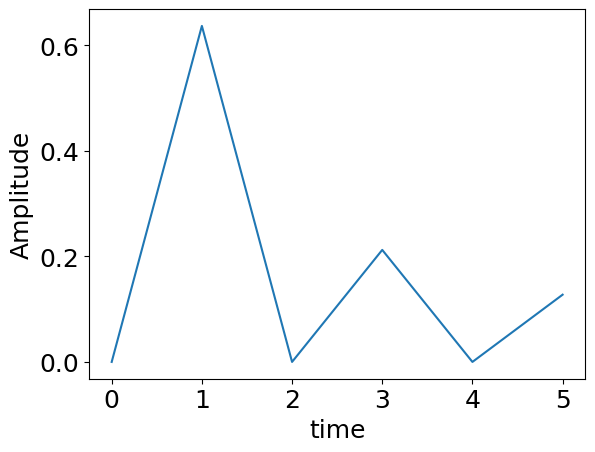

In [ ]:
# TODO: グラフを表示するプログラムを考える
c = []
for i in range(6):
  c.append(
    np.abs(calc_ck(rectwave,N,i))
  )
plt.tick_params(labelsize=18)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=18)
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.plot(c)

以下の関数を必要に応じて使用すること。
```
numpy.abs(x)
```

Calculate the absolute value element-wise.


Parameters:

- `x`: Input array.

リストも活用できる。以下の資料でリストに使えるメソッドが紹介されている。

[2-2. リスト (list) — Pythonプログラミング入門 documentation](https://utokyo-ipp.github.io/2/2-2.html#%E3%83%AA%E3%82%B9%E3%83%88%E3%82%92%E6%93%8D%E4%BD%9C%E3%81%99%E3%82%8B%E3%83%A1%E3%82%BD%E3%83%83%E3%83%89%E3%81%AA%E3%81%A9)

方形波と同じ要領で三角波を作成し、係数をグラフとして表示する。振幅の最大値は1, 最小値は-1である。

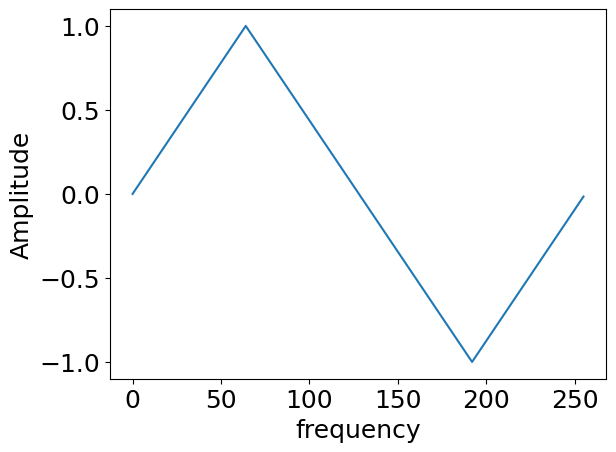

In [ ]:
N = 256
t = np.arange(N)
triwave = np.zeros(N)

# 三角波を作成
for i in range(N):
    phase = (i / N) * 4  # 周期を4分割して傾きを変える
    if phase < 1:
        triwave[i] = phase  # 上昇
    elif phase < 3:
        triwave[i] = 2 - phase  # 下降
    else:
        triwave[i] = phase - 4  # 上昇（負）
# TODO: 三角波のプログラムを考える
triwave = triwave * 1.0
plt.tick_params(labelsize=18)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=18)
plt.ylabel("Amplitude")
plt.xlabel("frequency")

plt.plot(triwave)

三角波のプログラムがどうしてもわからない場合、14:00以降に正解を提示します。

In [ ]:
c0=calc_ck(triwave,N,0)
print(c0)

0j


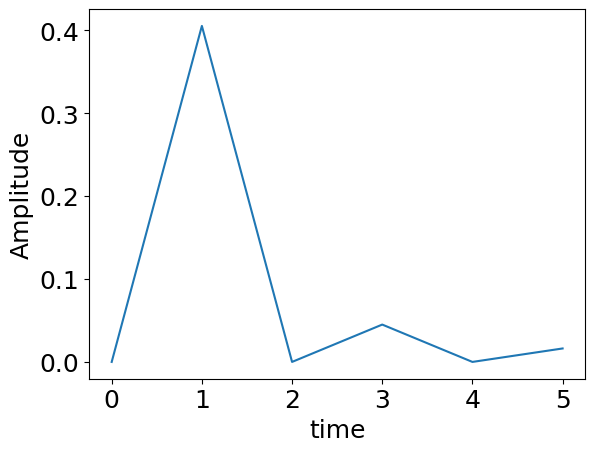

In [ ]:
# TODO: 上で作成したグラフを表示するプログラムを活用し、
# 三角波の各係数のグラフを表示する
c = []
for i in range(6):
  c.append(
    np.abs(calc_ck(triwave,N,i))
  )
plt.tick_params(labelsize=18)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=18)
plt.ylabel("Amplitude")
plt.xlabel("time")
plt.plot(c)


## 3.2 離散フーリエ変換

上でそれぞれの係数を計算したが、関数を使って係数を一気に計算する。

ここでは係数は絶対値でなく、複素数をそのまま用いる。

まずは方形波から

In [ ]:
N=256
c_rect = np.zeros(N, dtype=np.complex128)
for i in range(N):
  c_rect[i] = calc_ck(rectwave, N, i)

print(c_rect)

[ 0.00000000e+00+0.00000000e+00j  7.81250000e-03-6.36587814e-01j
 -1.86482774e-17-1.21430643e-17j  7.81250000e-03-2.12110708e-01j
  1.95156391e-17+2.02745806e-17j  7.81250000e-03-1.27164125e-01j
  1.17093835e-17+4.55364912e-18j  7.81250000e-03-9.07218661e-02j
 -2.86229374e-17+6.72205347e-18j  7.81250000e-03-7.04476747e-02j
 -6.15826834e-17+1.81061763e-17j  7.81250000e-03-5.75225597e-02j
 -6.50521303e-18+2.55871713e-17j  7.81250000e-03-4.85545920e-02j
 -3.64291930e-17-2.38524478e-18j  7.81250000e-03-4.19608628e-02j
 -1.11022302e-16-5.42101086e-17j  7.81250000e-03-3.69033541e-02j
  1.55257751e-16-1.15792792e-16j  7.81250000e-03-3.28968909e-02j
  6.15826834e-17+6.50521303e-18j  7.81250000e-03-2.96411203e-02j
  8.67361738e-19+9.10729825e-18j  7.81250000e-03-2.69401544e-02j
  1.12757026e-17-8.50014503e-17j  7.81250000e-03-2.46607839e-02j
  5.50774704e-17+1.17527515e-16j  7.81250000e-03-2.27092638e-02j
  7.93635990e-17-3.94649591e-17j  7.81250000e-03-2.10177050e-02j
 -2.99239800e-17+1.166601

`c_29`までの係数を実部と虚部に分けてグラフにしてみる。


[ 0.00000000e+00+0.00000000e+00j  7.81250000e-03-6.36587814e-01j
 -1.86482774e-17-1.21430643e-17j  7.81250000e-03-2.12110708e-01j
  1.95156391e-17+2.02745806e-17j  7.81250000e-03-1.27164125e-01j
  1.17093835e-17+4.55364912e-18j  7.81250000e-03-9.07218661e-02j
 -2.86229374e-17+6.72205347e-18j  7.81250000e-03-7.04476747e-02j
 -6.15826834e-17+1.81061763e-17j  7.81250000e-03-5.75225597e-02j
 -6.50521303e-18+2.55871713e-17j  7.81250000e-03-4.85545920e-02j
 -3.64291930e-17-2.38524478e-18j  7.81250000e-03-4.19608628e-02j
 -1.11022302e-16-5.42101086e-17j  7.81250000e-03-3.69033541e-02j
  1.55257751e-16-1.15792792e-16j  7.81250000e-03-3.28968909e-02j
  6.15826834e-17+6.50521303e-18j  7.81250000e-03-2.96411203e-02j
  8.67361738e-19+9.10729825e-18j  7.81250000e-03-2.69401544e-02j
  1.12757026e-17-8.50014503e-17j  7.81250000e-03-2.46607839e-02j
  5.50774704e-17+1.17527515e-16j  7.81250000e-03-2.27092638e-02j
  7.93635990e-17-3.94649591e-17j  7.81250000e-03-2.10177050e-02j
 -2.99239800e-17+1.166601

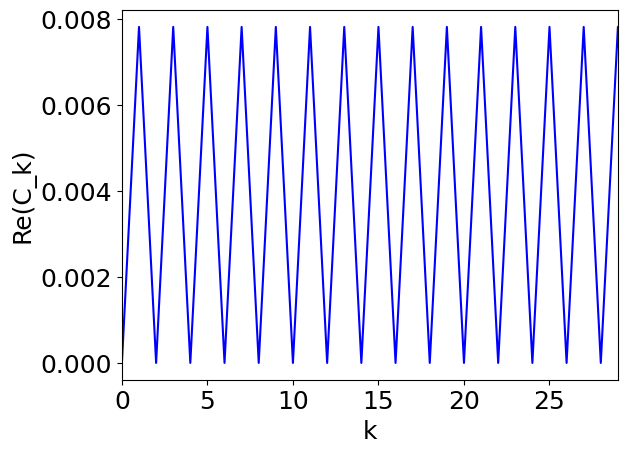

In [ ]:
# TODO: c_0からc_29までの係数のうち、実部をグラフとして表示する。
c_rect = np.zeros(N, dtype=np.complex128)
for i in range(N):
  c_rect[i] = calc_ck(rectwave, N, i)
plt.xlim(0,29)
plt.plot(np.real(c_rect),color='blue')
plt.xlabel("k",fontsize=18)
plt.ylabel("Re(C_k)",fontsize=18)
plt.tick_params(labelsize=18)
print(c_rect)


必要に応じて以下の関数を使う。

```
numpy.real(val)
```

Return the real part of the complex argument.



Parameters:

- `val`: Input array.

また、配列のうち範囲を指定して取り出すにはスライスを利用する。

以下にスライスの説明がある。

[2-1. 文字列 (string) — Pythonプログラミング入門 documentation](https://utokyo-ipp.github.io/2/2-1.html#%E6%96%87%E5%AD%97%E5%88%97%E3%81%A8%E3%82%B9%E3%83%A9%E3%82%A4%E3%82%B9)

次に、虚部をグラフとして表示する。

[ 0.00000000e+00+0.00000000e+00j  7.81250000e-03-6.36587814e-01j
 -1.86482774e-17-1.21430643e-17j  7.81250000e-03-2.12110708e-01j
  1.95156391e-17+2.02745806e-17j  7.81250000e-03-1.27164125e-01j
  1.17093835e-17+4.55364912e-18j  7.81250000e-03-9.07218661e-02j
 -2.86229374e-17+6.72205347e-18j  7.81250000e-03-7.04476747e-02j
 -6.15826834e-17+1.81061763e-17j  7.81250000e-03-5.75225597e-02j
 -6.50521303e-18+2.55871713e-17j  7.81250000e-03-4.85545920e-02j
 -3.64291930e-17-2.38524478e-18j  7.81250000e-03-4.19608628e-02j
 -1.11022302e-16-5.42101086e-17j  7.81250000e-03-3.69033541e-02j
  1.55257751e-16-1.15792792e-16j  7.81250000e-03-3.28968909e-02j
  6.15826834e-17+6.50521303e-18j  7.81250000e-03-2.96411203e-02j
  8.67361738e-19+9.10729825e-18j  7.81250000e-03-2.69401544e-02j
  1.12757026e-17-8.50014503e-17j  7.81250000e-03-2.46607839e-02j
  5.50774704e-17+1.17527515e-16j  7.81250000e-03-2.27092638e-02j
  7.93635990e-17-3.94649591e-17j  7.81250000e-03-2.10177050e-02j
 -2.99239800e-17+1.166601

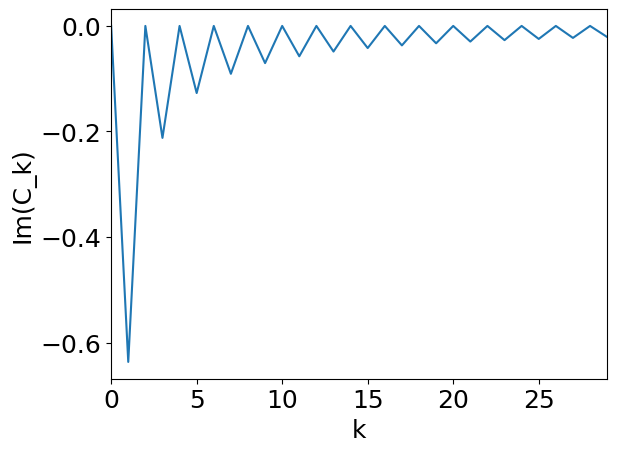

In [ ]:
# TODO: c_0からc_29までの係数のうち、虚部をグラフとして表示する。
plt.plot(np.imag(c_rect[:30]))
plt.xlim(0,29)
plt.xlabel("k",fontsize=18)
plt.ylabel("Im(C_k)",fontsize=18)
plt.tick_params(labelsize=18)
print(c_rect)


必要に応じて以下の関数を使う。

```
numpy.imag(val)
```

Return the imaginary part of the complex argument.



Parameters:

- `val`: Input array.

三角波についても、同様の操作を行う。

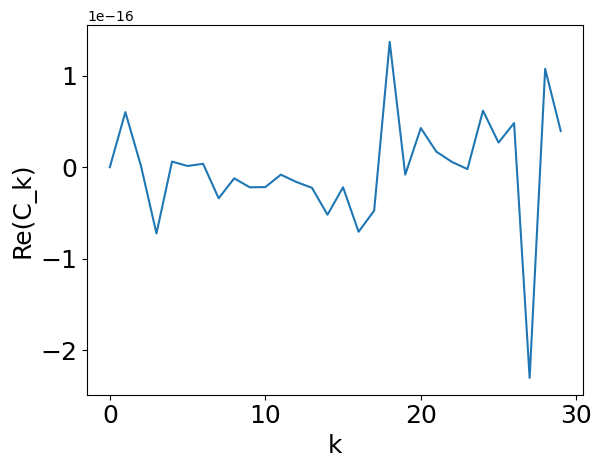

In [ ]:

c_tri = np.zeros(N, dtype=np.complex128)
for i in range(N):
  c_tri[i] = calc_ck(triwave, N, i)
# TODO: 三角波のc_0からc_29までの係数のうち、
# 実部をグラフとして表示する。
plt.xlabel("k",fontsize=18)
plt.ylabel("Re(C_k)",fontsize=18)
plt.tick_params(labelsize=18)
plt.plot(np.real(c_tri[:30]))



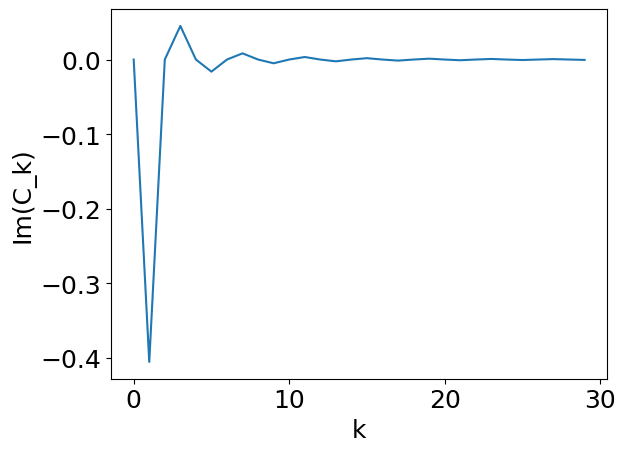

In [ ]:
# TODO: 虚部も同様にグラフにする。
c_tri = np.zeros(N, dtype=np.complex128)
for i in range(N):
  c_tri[i] = calc_ck(triwave, N, i)
# TODO: 三角波のc_0からc_29までの係数のうち、
# 実部をグラフとして表示する。
plt.xlabel("k",fontsize=18)
plt.ylabel("Im(C_k)",fontsize=18)
plt.tick_params(labelsize=18)
plt.plot(np.imag(c_tri[:30]))

## 3.3 逆離散フーリエ変換

計算した$c$から、波形を復元するための関数を作成する。

<ipython-input-89-969901424>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  rect_decoded[i] = calc_fi(c_rect, N, i)


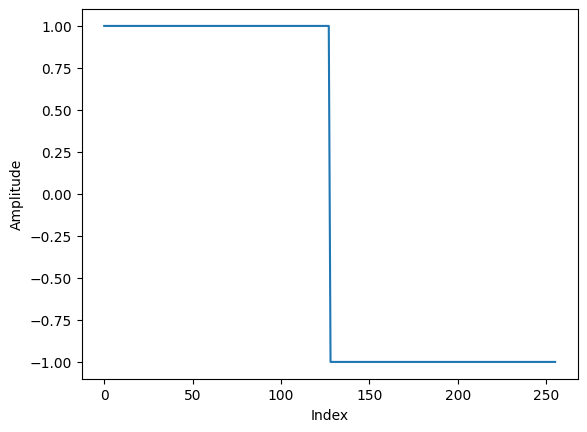

interactive(children=(IntSlider(value=30, description='k_limit', max=50, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_decoded_rect_waveform(k_limit=30)>

In [ ]:
def calc_fi(c, N, i, k_limit = 256):
  fi = 0
  for k in range(k_limit):
    # TODO: calc_ck()関数を参考に、関数の中身を記述する。
    fi +=c[k] * np.exp(1j * (2 * np.pi * k / N) * i)
  return fi
rect_decoded = np.zeros(N)
for i in range(N):
  rect_decoded[i] = calc_fi(c_rect, N, i)
plt.xlabel("Index")  # X軸のラベル
plt.ylabel("Amplitude")
plt.plot(rect_decoded)
def plot_decoded_rect_waveform(k_limit = 30):
  decoded = np.zeros(N)
  for i in range(N):
    decoded[i] = calc_fi(c_rect, N, i, k_limit = k_limit)
  plt.xlabel("Index",fontsize=18)
  plt.ylabel("Amplitude",fontsize=18)
  plt.plot(decoded)
  plt.tick_params(labelsize=18)
interact(plot_decoded_rect_waveform, k_limit = (1, 50))

この関数に方形波から計算した$c$を入力し、波形を復元する。

<ipython-input-76-1260095013>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  rect_decoded[i] = calc_fi(c_rect, N, i)


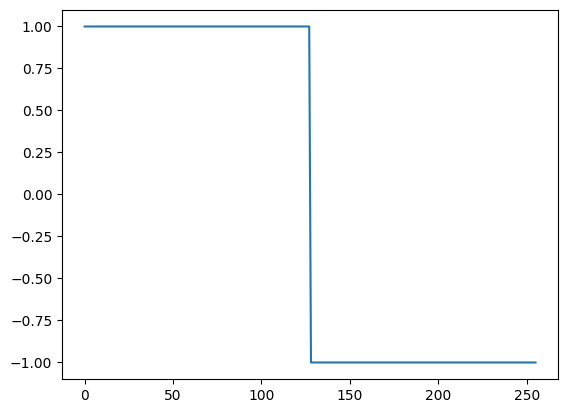

In [ ]:
rect_decoded = np.zeros(N)

for i in range(N):
  rect_decoded[i] = calc_fi(c_rect, N, i)

plt.plot(rect_decoded)

では、復元に使う$c$をある程度の範囲に制限するとどうなるだろうか。

以下を実行し、スライダーを動かすと係数の範囲を制限できる。

In [ ]:
def plot_decoded_rect_waveform(k_limit = 30):
  decoded = np.zeros(N)
  for i in range(N):
    decoded[i] = calc_fi(c_rect, N, i, k_limit = k_limit)
  plt.plot(decoded)

interact(plot_decoded_rect_waveform, k_limit = (1, 30))

interactive(children=(IntSlider(value=30, description='k_limit', max=30, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_decoded_rect_waveform(k_limit=30)>

三角波についても、同様に波形を復元する。

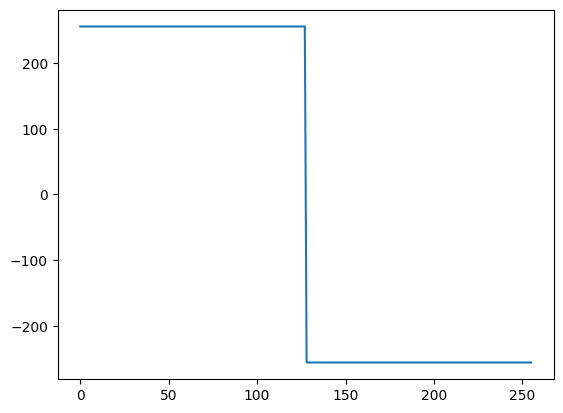

In [ ]:
tri_decoded = np.zeros(N)

for i in range(N):
  tri_decoded[i] = calc_fi(c_tri, N, i)

plt.plot(tri_decoded)

In [ ]:
def plot_decoded_tri_waveform(k_limit = 30):
  decoded = np.zeros(N)
  for i in range(N):
    decoded[i] = calc_fi(c_tri, N, i, k_limit = k_limit)
  plt.plot(decoded)
  plt.ylabel("Amplitude",fontsize=18)
  plt.tick_params(labelsize=18)

interact(plot_decoded_tri_waveform, k_limit = (1, 50))

interactive(children=(IntSlider(value=30, description='k_limit', max=50, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_decoded_tri_waveform(k_limit=30)>

## 3.4 振幅変調

信号波として周波数$f_s$のcos波を振幅変調すると、以下の式となる。

以下の数式をプログラムにし、離散フーリエ変換を行って$c$の絶対値を$c_{30}$くらいまで表示する。

$$ V_{AM}[i]=\left(1+m_a \cos{(2\pi i f_s /N)}\right)\cos{(2\pi f_c i/N)} \,\,\,(i=0, 1, \ldots , 255) $$

ただし、搬送波の周波数$ f_c=10, N=256$とする。

その他のパラメータは適切に変更し、変化を確認する。


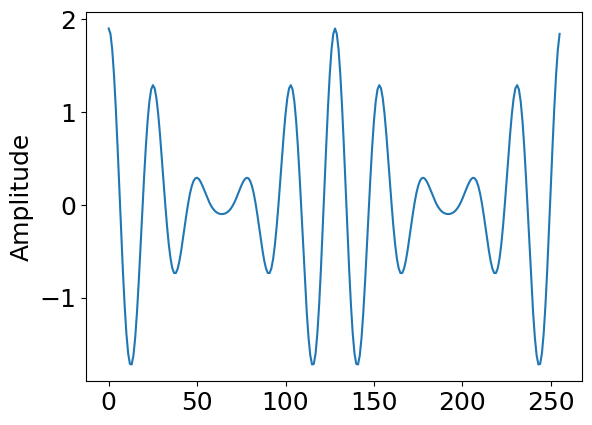

In [ ]:
pi = np.pi
fc = 10    # 搬送波の周波数
N = 256    # サンプル数
fs = 2     # 信号波の周波数
ma = 0.9   # 変調度

# インデックス配列
i = np.arange(N)

# AM波の生成
V_AM = (1 + ma * np.cos(2 * pi * fs * i / N)) * np.cos(2 * pi * fc * i / N)

# 波形のプロット
plt.ylabel("Amplitude",fontsize=18)
plt.tick_params(labelsize=18)
plt.plot(V_AM)

必要に応じて以下の関数を使う。

```
numpy.cos(x)
```

Cosine element-wise.


Parameters:

- `x`: Input array in radians.


<ipython-input-100-4110429792>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  c_AM[i] = calc_ck(V_AM,N,i)


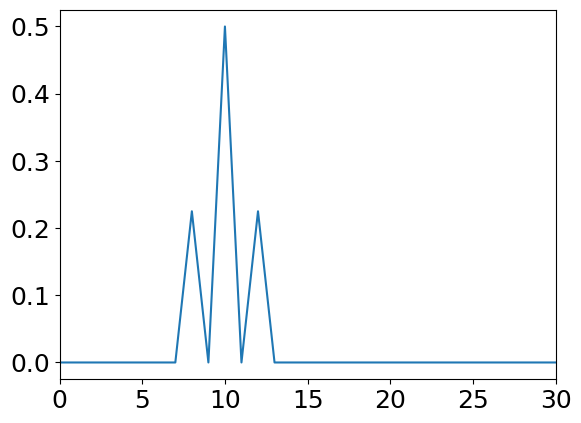

In [ ]:
# TODO: 係数を求める
c_AM = np.zeros(N)
for i in range(N):
  c_AM[i] = calc_ck(V_AM,N,i)

# TODO: グラフとして表示する
plt.tick_params(labelsize=18)
plt.xlim(0,30)
plt.plot(c_AM)


FM波形に対しても同様に振幅スペクトルを表示する。

信号波として周波数$f_s$のcos波を周波数変調すると、以下の式となる。

$$ V_{FM}[i]=\cos{(2\pi i f_c/N+\beta \sin{(2\pi i f_s/N)})} \,\,\,(i=0, 1, \ldots , 255)$$

周波数変調した波形について、離散フーリエ変換を行い振幅スペクトルを図示する。

ただし、搬送波の周波数$ f_c=10, N=256$ とする。

その他のパラメータは適切に変更し、変化を確認する。


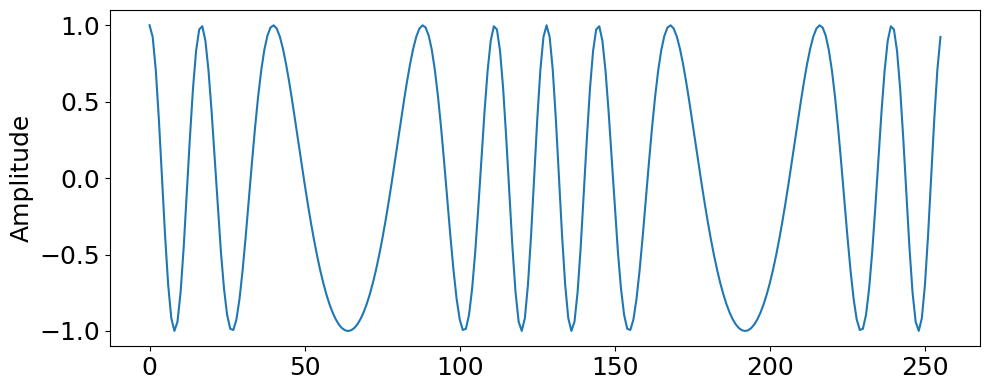

In [ ]:

pi = np.pi
fc = 10     # 搬送波周波数
fs = 2      # 信号波周波数
beta = 3.0  # 周波数偏移（変調指数）
N = 256     # サンプル数

# インデックス配列
i = np.arange(N)

# FM波の生成
V_FM = np.cos(2 * pi * fc * i / N + beta * np.sin(2 * pi * fs * i / N))

# FM波形の表示
plt.figure(figsize=(10, 4))
plt.plot(V_FM)
plt.ylabel("Amplitude",fontsize=18)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.show()


<ipython-input-113-2284576137>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  c_FM[i] = calc_ck(V_FM,N,i)


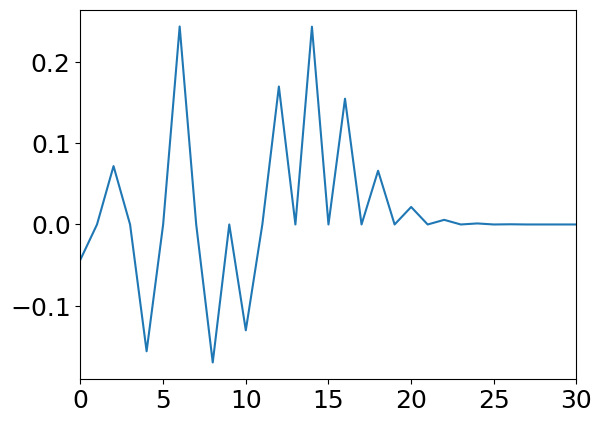

In [ ]:
c_FM=np.zeros(N)
for i in range(N):
  c_FM[i] = calc_ck(V_FM,N,i)
plt.tick_params(labelsize=18)
plt.xlim(0,30)
plt.plot(c_FM)
